In [43]:
import matplotlib.pyplot as plt
from subprocess import check_output
import pandas as pd
import os
from io import StringIO

img_path = './test-data/ex1.jpg'

print("Working directory:", os.getcwd())
print("Image path:", img_path)

image = plt.imread(img_path)

Working directory: /home/rutayisire/projects/dataset-retriever/tesseract-annotator
Image path: ./test-data/ex1.jpg


In [20]:
# run tesseract
out = StringIO(check_output(['tesseract', img_path, "-", "-l", "eng", "tsv"]).decode('utf-8'))

df = pd.read_table(out, sep='\t')

Estimating resolution as 310


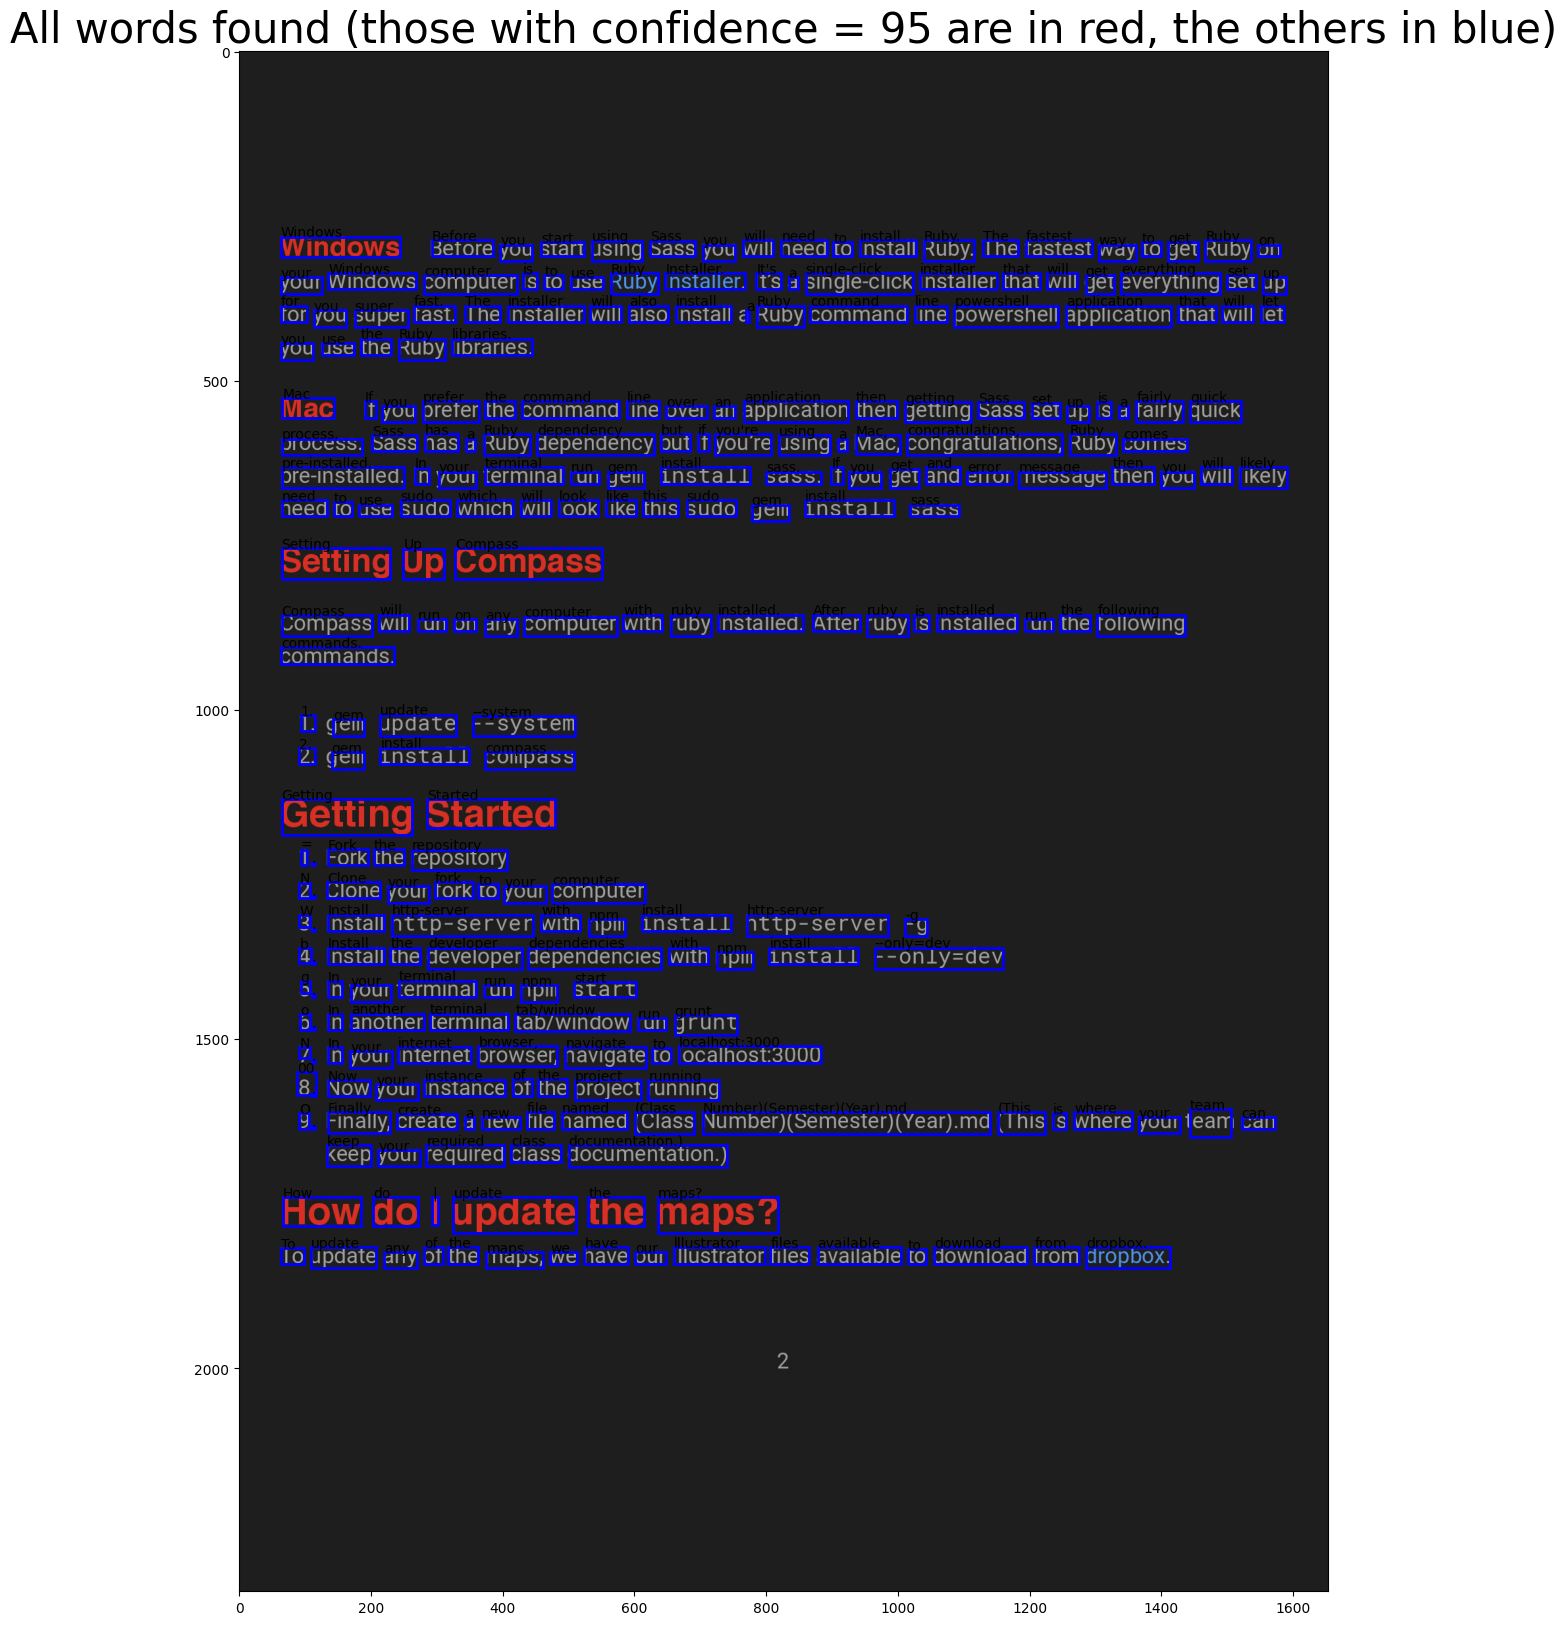

In [16]:
images = df[(df['level'] == 5)]


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)

for _, row in images.iterrows():
    ax.text(row['left'], row['top'], row['text'], fontsize=10)
    ax.add_patch(plt.Rectangle((row['left'], row['top']), row['width'], row['height'], fill=False, edgecolor=('blue' if row['conf'] != 95 else 'red'), linewidth=2))

plt.title('All words found (those with confidence = 95 are in red, the others in blue)', fontsize=30)

plt.show()


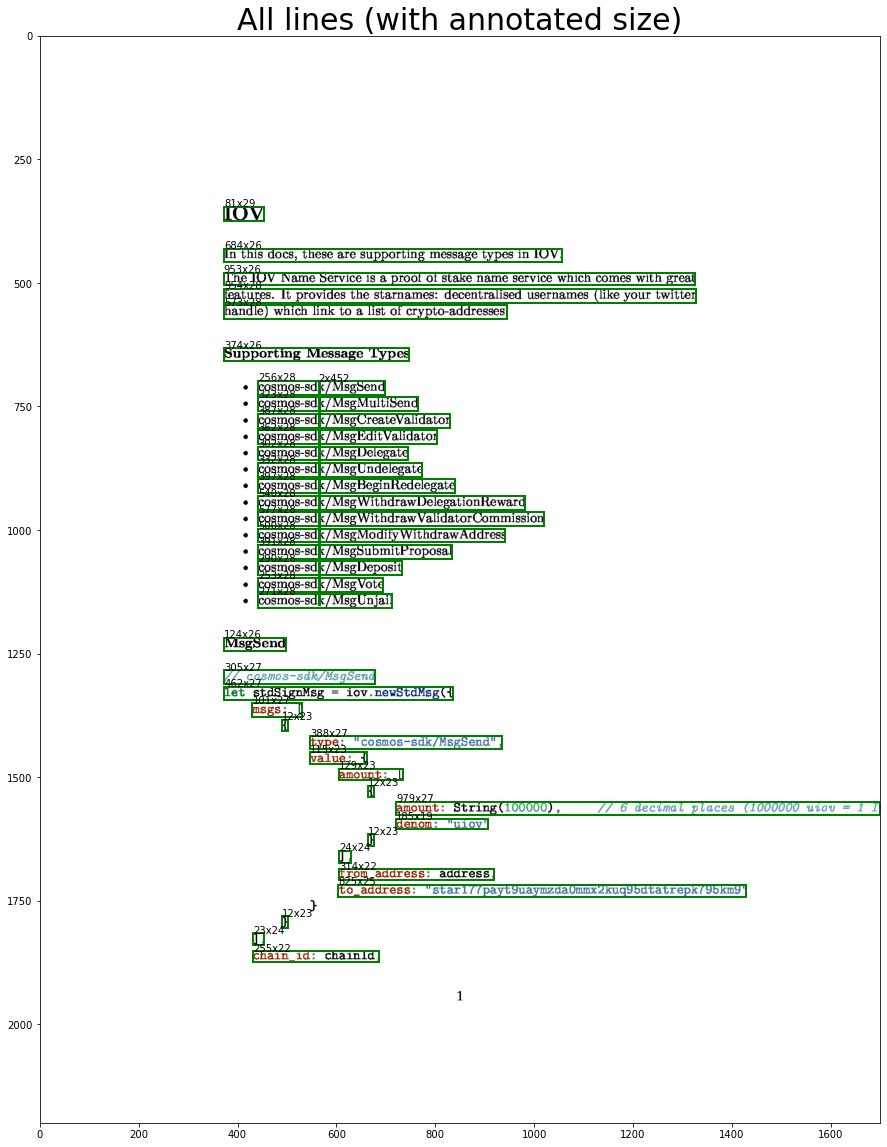

In [47]:
images = df[(df['level'] == 4)]


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)

for _, row in images.iterrows():
    ax.text(row['left'], row['top'], "{}x{}".format(row['width'], row['height']), fontsize=10)
    ax.add_patch(plt.Rectangle((row['left'], row['top']), row['width'], row['height'], fill=False, edgecolor='green', linewidth=2))

plt.title('All lines (with annotated size)', fontsize=30)

plt.show()


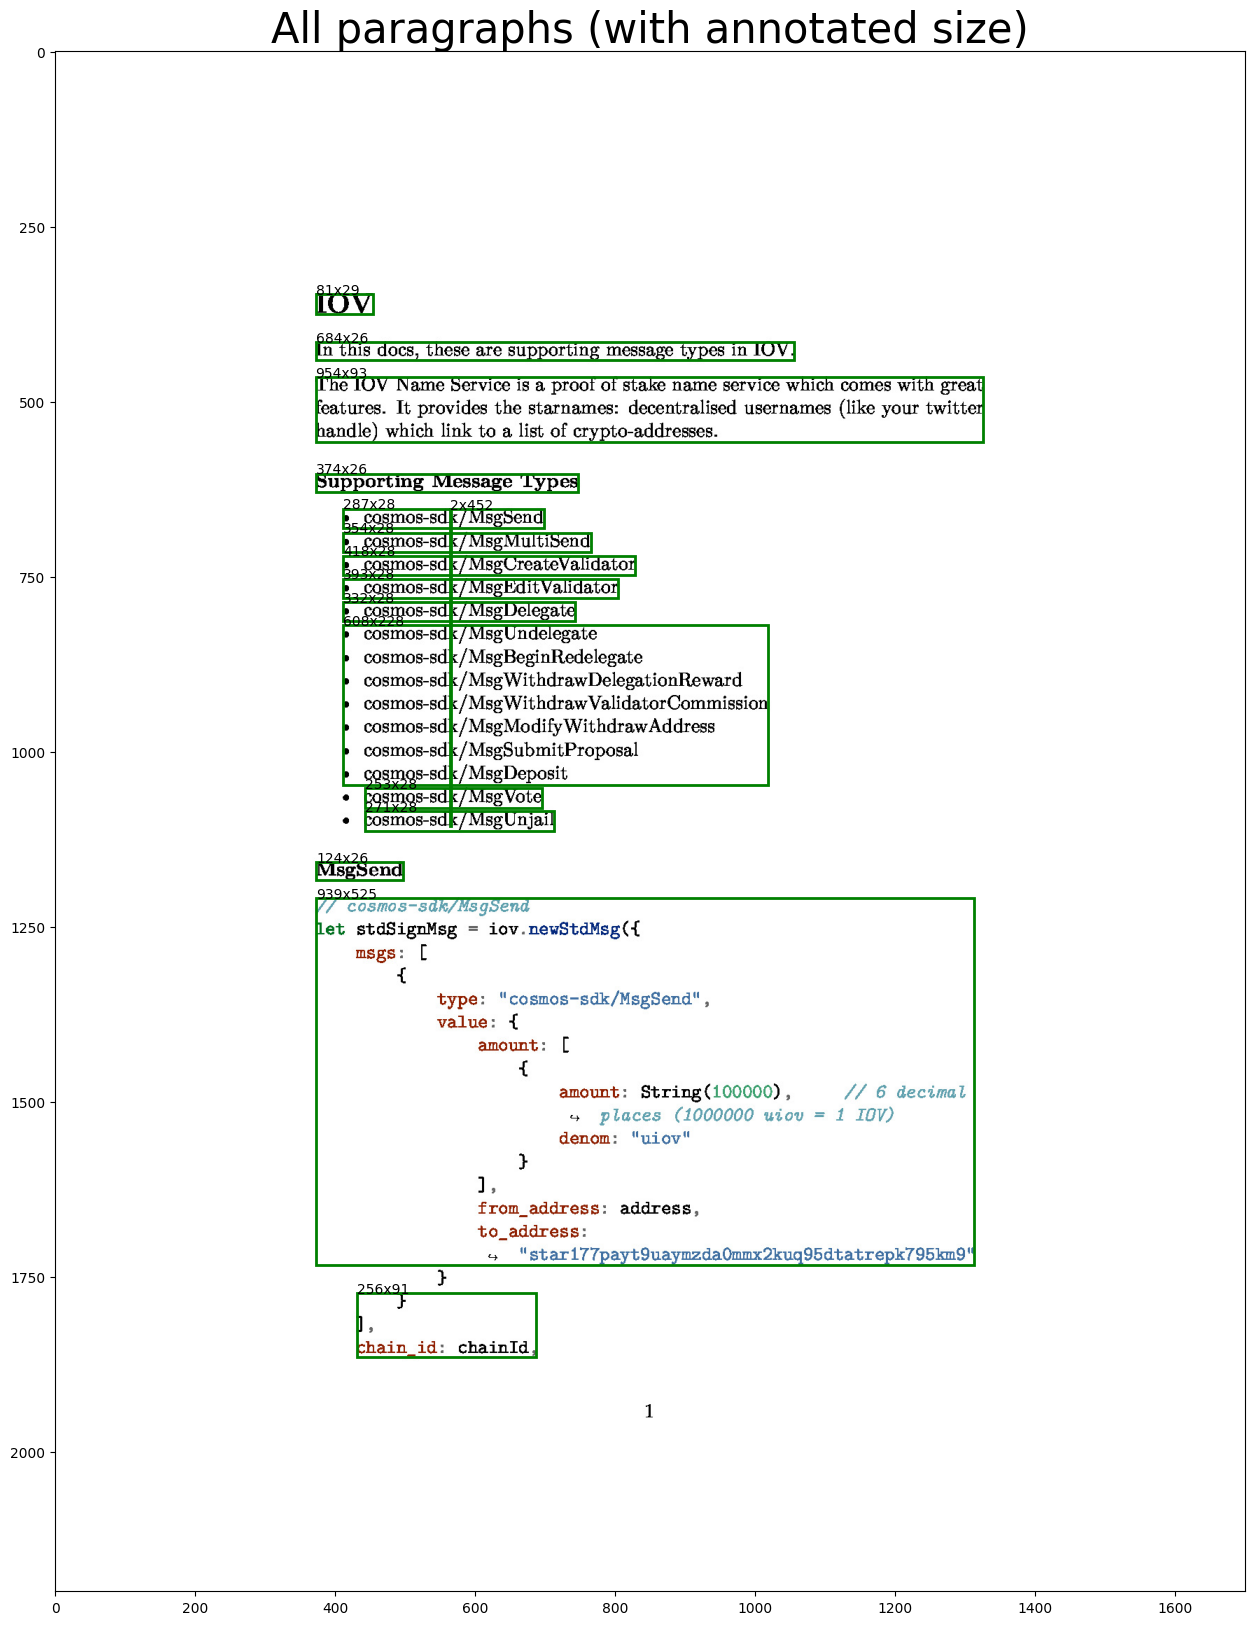

In [7]:
images = df[(df['level'] == 3)]


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)

for _, row in images.iterrows():
    ax.text(row['left'], row['top'], "{}x{}".format(row['width'], row['height']), fontsize=10)
    ax.add_patch(plt.Rectangle((row['left'], row['top']), row['width'], row['height'], fill=False, edgecolor='green', linewidth=2))

plt.title('All paragraphs (with annotated size)', fontsize=30)

plt.savefig("output.jpg")

plt.show()



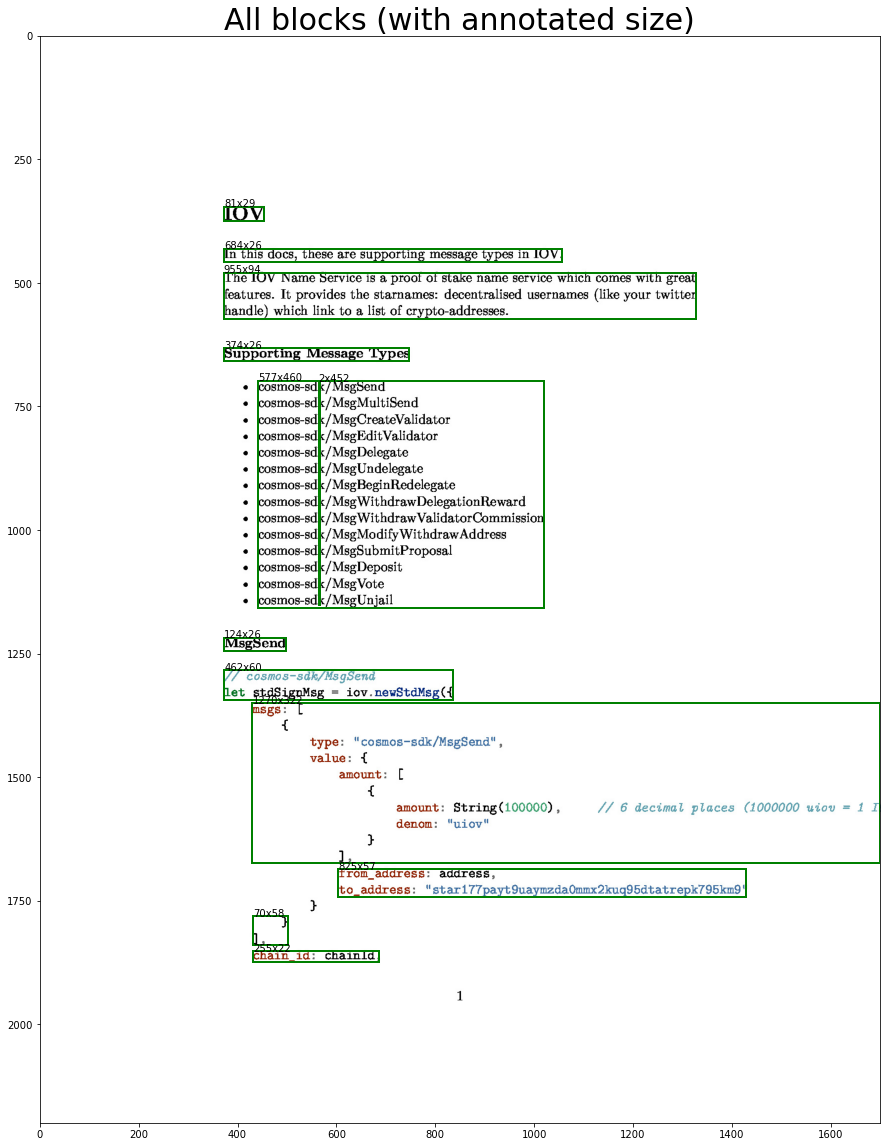

In [49]:
images = df[(df['level'] == 2)]


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)

for _, row in images.iterrows():
    ax.text(row['left'], row['top'], "{}x{}".format(row['width'], row['height']), fontsize=10)
    ax.add_patch(plt.Rectangle((row['left'], row['top']), row['width'], row['height'], fill=False, edgecolor='green', linewidth=2))

plt.title('All blocks (with annotated size)', fontsize=30)

plt.show()
